In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Load Glass Dataset 
# ===============================================================
data = {
    'RI': [1.52101,1.51761,1.51618,1.51766,1.51742,1.51596,1.51743,1.51756,1.51918,1.51755],
    'Na': [13.64,12.89,12.79,12.56,12.64,12.61,12.84,12.94,13.48,12.85],
    'Mg': [4.49,3.60,3.61,3.48,3.48,3.59,3.94,3.99,3.87,3.56],
    'Al': [1.10,1.36,1.62,1.56,1.54,1.63,1.54,1.30,1.25,1.49],
    'Si': [71.78,72.73,73.03,73.36,73.10,73.23,72.32,72.61,72.98,72.32],
    'K': [0.06,0.48,0.39,0.57,0.58,0.57,0.64,0.60,0.55,0.60],
    'Ca': [8.75,7.83,7.78,8.09,8.17,8.24,8.32,8.68,7.59,8.53],
    'Ba': [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    'Fe': [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    'Type': [1,1,1,1,1,1,1,1,1,1]
}

df = pd.DataFrame(data)
print("✅ Dataset Loaded Successfully")
display(df.head())

✅ Dataset Loaded Successfully


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,12.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,12.79,3.61,1.62,73.03,0.39,7.78,0.0,0.0,1
3,1.51766,12.56,3.48,1.56,73.36,0.57,8.09,0.0,0.0,1
4,1.51742,12.64,3.48,1.54,73.10,0.58,8.17,0.0,0.0,1


In [3]:
# 3. Exploratory Data Analysis (EDA)
# ===============================================================
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      10 non-null     float64
 1   Na      10 non-null     float64
 2   Mg      10 non-null     float64
 3   Al      10 non-null     float64
 4   Si      10 non-null     float64
 5   K       10 non-null     float64
 6   Ca      10 non-null     float64
 7   Ba      10 non-null     float64
 8   Fe      10 non-null     float64
 9   Type    10 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 928.0 bytes

Summary Statistics:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0
mean,1.517756,12.924000,3.761000,1.439000,72.746000,0.504000,8.198000,0.0,0.0,1.0
std,0.001440,0.359852,0.316945,0.177354,0.492932,0.171348,0.388181,0.0,0.0,0.0
min,1.515960,12.560000,3.480000,1.100000,71.780000,0.060000,7.590000,0.0,0.0,1.0
25%,1.517422,12.677500,3.567500,1.315000,72.392500,0.497500,7.895000,0.0,0.0,1.0
50%,1.517555,12.845000,3.605000,1.515000,72.855000,0.570000,8.205000,0.0,0.0,1.0
75%,1.517648,12.927500,3.922500,1.555000,73.082500,0.595000,8.477500,0.0,0.0,1.0
max,1.521010,13.640000,4.490000,1.630000,73.360000,0.640000,8.750000,0.0,0.0,1.0



Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


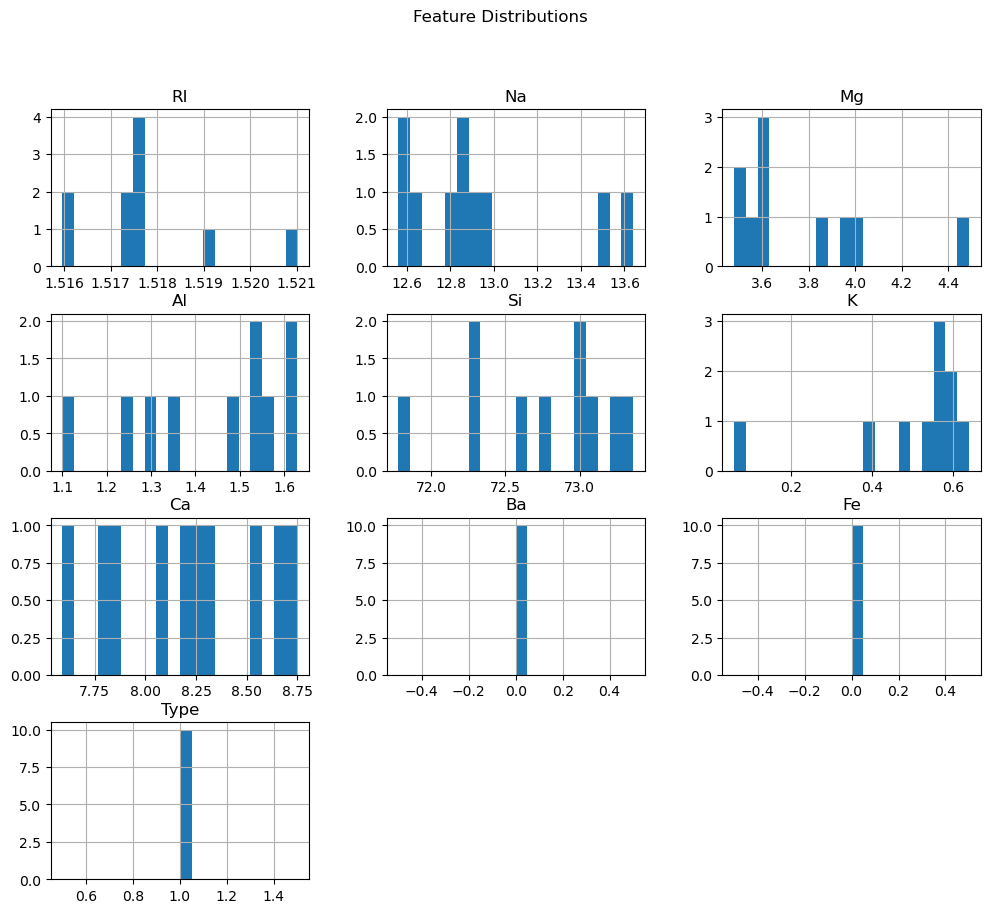

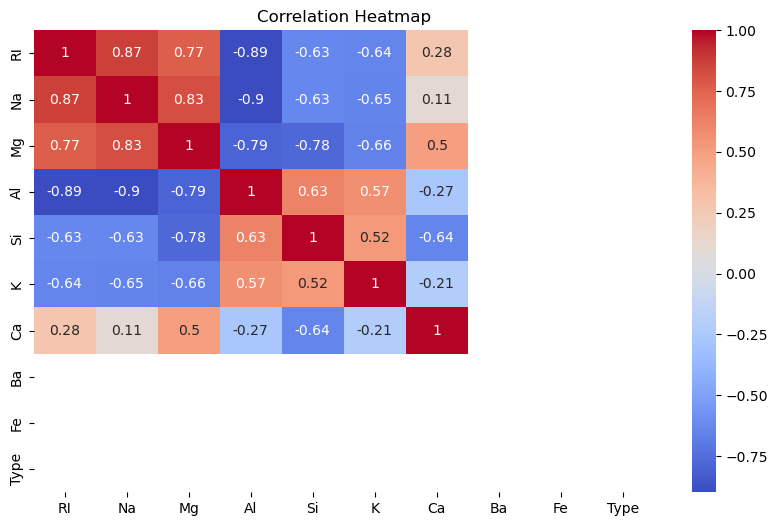

In [4]:
# 4. Data Visualization
# ===============================================================
# Histograms
df.hist(figsize=(12,10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# 5. Data Preprocessing
# ===============================================================
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled successfully.")

✅ Features scaled successfully.


In [6]:
# 6. Random Forest Model Implementation
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\n=== RANDOM FOREST PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


=== RANDOM FOREST PERFORMANCE ===
Accuracy: 1.0
Confusion Matrix:
 [[3]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Users\chall\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [8]:
# 7. Bagging Classifier
# ===============================================================
bag_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bag_model.fit(X_train, y_train)
y_bag = bag_model.predict(X_test)

print("\n=== BAGGING PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_bag))
print("Classification Report:\n", classification_report(y_test, y_bag))


=== BAGGING PERFORMANCE ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [16]:
#8.Boosting methods And Model comparision
import pandas as pd
import numpy as np

# Assuming your dataframe is called 'df'
# Let's check all columns to find the correct target variable
print("=== CHECKING ALL COLUMNS ===")
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

print("\n=== CHECKING FOR POTENTIAL TARGET COLUMNS ===")
# Check each column for potential as target variable
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"{column}: {len(unique_vals)} unique values - {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")

# If 'Type' should be the target but has only one class, we need more data
print(f"\nCurrent target 'Type' has only: {df['Type'].unique()}")

=== CHECKING ALL COLUMNS ===
Dataset info:
Shape: (10, 10)
Columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

First few rows:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  12.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  12.79  3.61  1.62  73.03  0.39  7.78  0.0  0.0     1
3  1.51766  12.56  3.48  1.56  73.36  0.57  8.09  0.0  0.0     1
4  1.51742  12.64  3.48  1.54  73.10  0.58  8.17  0.0  0.0     1

=== CHECKING FOR POTENTIAL TARGET COLUMNS ===
RI: 10 unique values - [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755]
Na: 10 unique values - [13.64 12.89 12.79 12.56 12.64 12.61 12.84 12.94 13.48 12.85]
Mg: 9 unique values - [4.49 3.6  3.61 3.48 3.59 3.94 3.99 3.87 3.56]
Al: 9 unique values - [1.1  1.36 1.62 1.56 1.54 1.63 1.3  1.25 1.49]
Si: 9 unique values - [71.78 72.73 73.03 73.36 73.1  73.23 72.32 72.61 72.98]
K: 8 uniq

=== BOOSTING METHODS & MODEL COMPARISON (REGRESSION) ===
Dataset shape: (10, 8)
Target variable (RI) range: 1.5160 to 1.5210

=== MODEL PERFORMANCE COMPARISON ===

Linear Regression:
  MSE:  0.000234
  RMSE: 0.015309
  MAE:  0.011907
  R²:   -134.600328

Decision Tree:
  MSE:  0.000003
  RMSE: 0.001662
  MAE:  0.001653
  R²:   -0.597565

Random Forest:
  MSE:  0.000001
  RMSE: 0.001105
  MAE:  0.001056
  R²:   0.293446

AdaBoost:
  MSE:  0.000002
  RMSE: 0.001267
  MAE:  0.001092
  R²:   0.071650

Gradient Boost:
  MSE:  0.000000
  RMSE: 0.000643
  MAE:  0.000571
  R²:   0.760752

MODEL COMPARISON SUMMARY:
                        MSE      RMSE       MAE          R²
Linear Regression  0.000234  0.015309  0.011907 -134.600328
Decision Tree      0.000003  0.001662  0.001653   -0.597565
Random Forest      0.000001  0.001105  0.001056    0.293446
AdaBoost           0.000002  0.001267  0.001092    0.071650
Gradient Boost     0.000000  0.000643  0.000571    0.760752


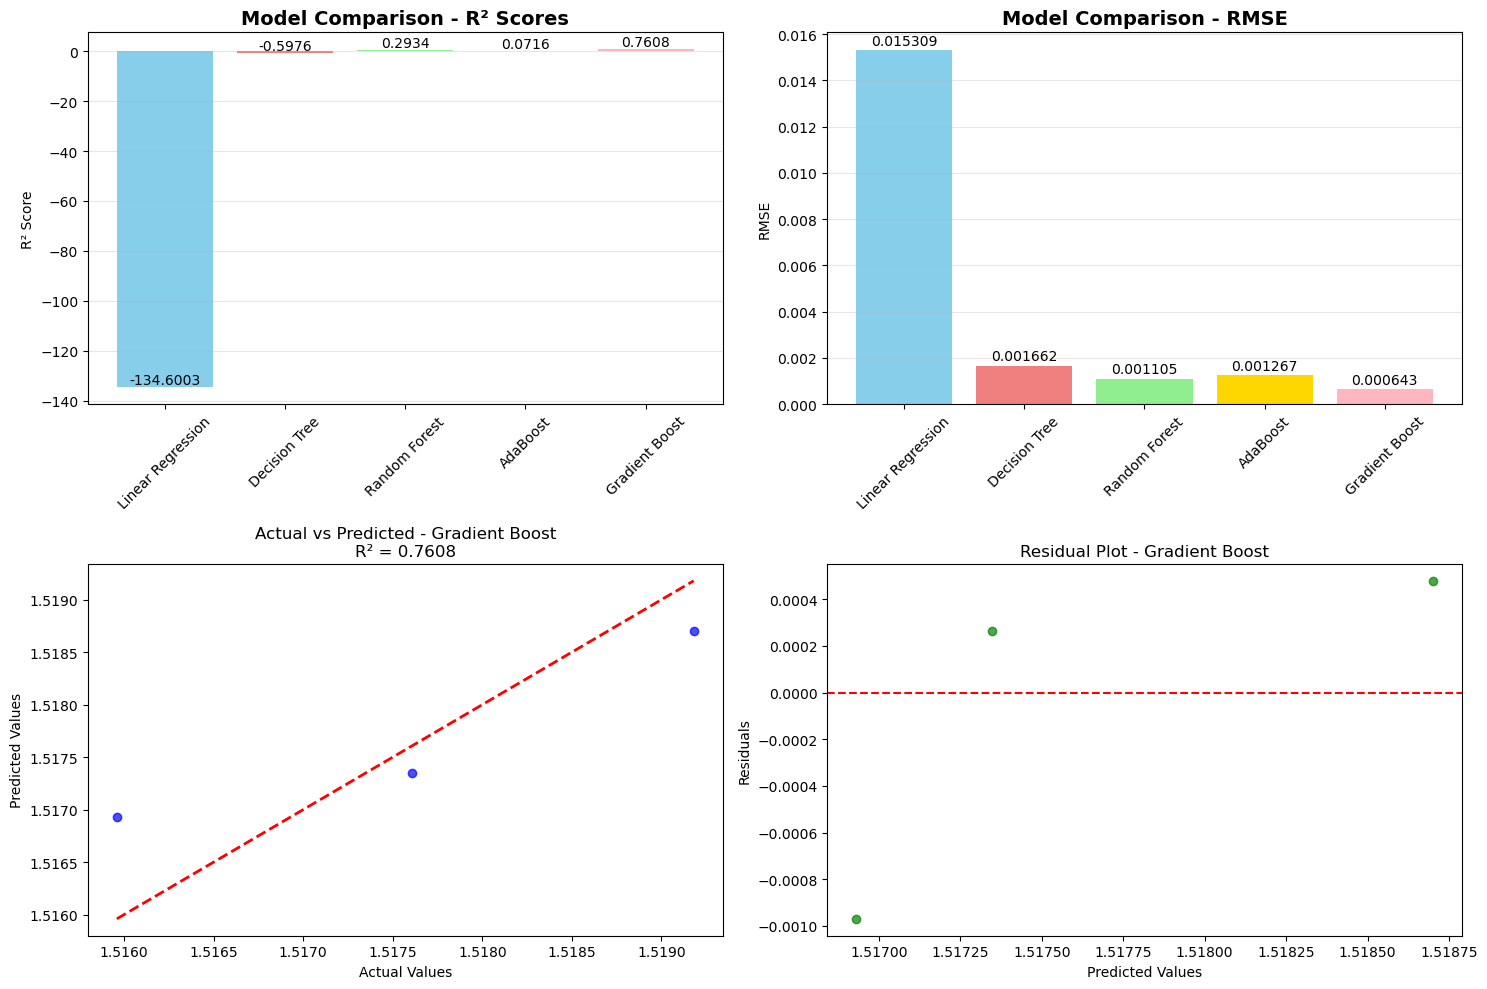


DETAILED BOOSTING METHODS ANALYSIS:


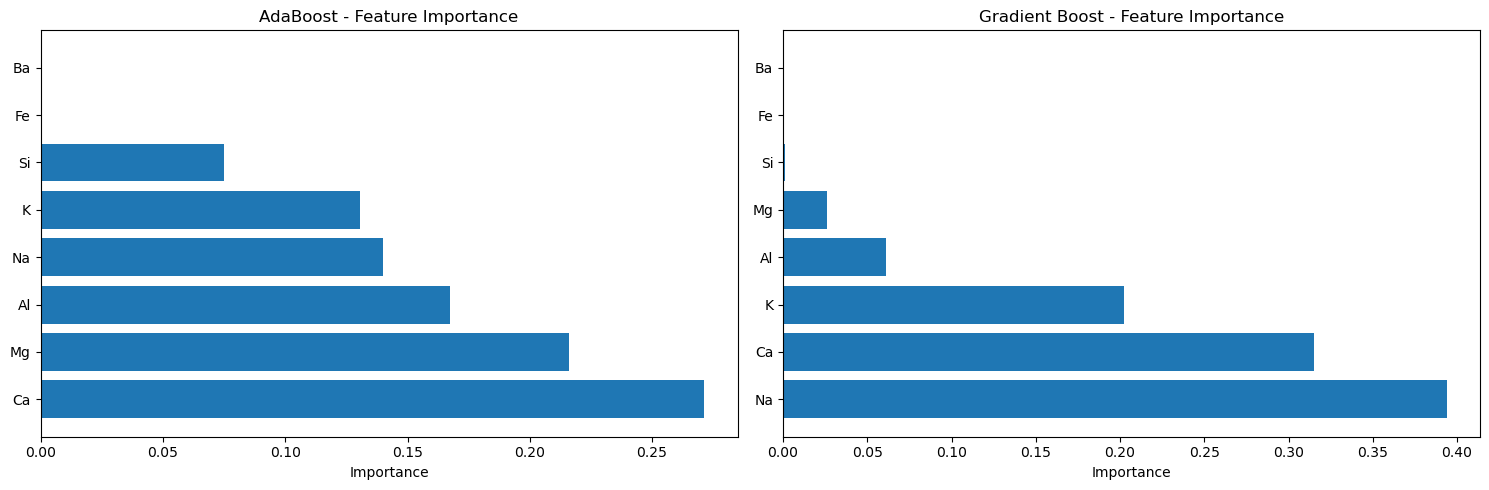


PERFORMANCE RANKING:

Ranked by R² Score (Higher is better):
1. Gradient Boost: R² = 0.760752
2. Random Forest: R² = 0.293446
3. AdaBoost: R² = 0.071650
4. Decision Tree: R² = -0.597565
5. Linear Regression: R² = -134.600328

Ranked by RMSE (Lower is better):
1. Gradient Boost: RMSE = 0.000643
2. Random Forest: RMSE = 0.001105
3. AdaBoost: RMSE = 0.001267
4. Decision Tree: RMSE = 0.001662
5. Linear Regression: RMSE = 0.015309

CROSS-VALIDATION RESULTS (5-fold):
Linear Regression: Mean R² = -1626.9322 (+/- 5933.3235)
Decision Tree: Mean R² = -0.7985 (+/- 2.8362)
Random Forest: Mean R² = -12.8355 (+/- 49.5552)
AdaBoost: Mean R² = -1.4969 (+/- 2.5119)
Gradient Boost: Mean R² = -16.3500 (+/- 64.8238)

RECOMMENDATION:
🏆 Best performing model: Gradient Boost
   R² Score: 0.7608
   RMSE: 0.000643
💡 Boosting method performed best!


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("=== BOOSTING METHODS & MODEL COMPARISON (REGRESSION) ===")

# Since classification isn't possible with one class, we'll predict RI (Refractive Index) as target
X = df.drop(['RI', 'Type'], axis=1)  # Features - remove RI (target) and Type (constant)
y = df['RI']  # Target variable - Refractive Index (continuous)

print(f"Dataset shape: {X.shape}")
print(f"Target variable (RI) range: {y.min():.4f} to {y.max():.4f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
        n_estimators=100,
        random_state=42
    ),
    'Gradient Boost': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
}

# Train and evaluate models
results = {}
predictions = {}

print("\n=== MODEL PERFORMANCE COMPARISON ===")
print("=" * 60)

for name, model in models.items():
    # Train model
    if name in ['Linear Regression', 'Decision Tree', 'Random Forest']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Use scaled data for boosting methods
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    predictions[name] = y_pred
    
    print(f"\n{name}:")
    print(f"  MSE:  {mse:.6f}")
    print(f"  RMSE: {rmse:.6f}")
    print(f"  MAE:  {mae:.6f}")
    print(f"  R²:   {r2:.6f}")

# Create comparison DataFrame
results_df = pd.DataFrame(results).T
print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY:")
print("=" * 60)
print(results_df.round(6))

# Visualize model performance
plt.figure(figsize=(15, 10))

# Plot 1: Model Comparison - R² Scores
plt.subplot(2, 2, 1)
r2_scores = [results[model]['R²'] for model in models.keys()]
plt.bar(models.keys(), r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])
plt.title('Model Comparison - R² Scores', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Plot 2: Model Comparison - RMSE
plt.subplot(2, 2, 2)
rmse_scores = [results[model]['RMSE'] for model in models.keys()]
plt.bar(models.keys(), rmse_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])
plt.title('Model Comparison - RMSE', fontsize=14, fontweight='bold')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.0001, f'{v:.6f}', ha='center', va='bottom')

# Plot 3: Actual vs Predicted for best model
best_model_name = max(results, key=lambda x: results[x]['R²'])
best_predictions = predictions[best_model_name]

plt.subplot(2, 2, 3)
plt.scatter(y_test, best_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted - {best_model_name}\nR² = {results[best_model_name]["R²"]:.4f}')

# Plot 4: Residuals for best model
plt.subplot(2, 2, 4)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')

plt.tight_layout()
plt.show()

# Detailed analysis of boosting methods
print("\n" + "=" * 60)
print("DETAILED BOOSTING METHODS ANALYSIS:")
print("=" * 60)

# Feature importance for boosting methods
feature_names = X.columns

plt.figure(figsize=(15, 5))

# AdaBoost Feature Importance
plt.subplot(1, 2, 1)
ada_importance = models['AdaBoost'].feature_importances_
ada_idx = np.argsort(ada_importance)[::-1]
plt.barh(range(len(ada_importance)), ada_importance[ada_idx])
plt.yticks(range(len(ada_importance)), [feature_names[i] for i in ada_idx])
plt.title('AdaBoost - Feature Importance')
plt.xlabel('Importance')

# Gradient Boost Feature Importance
plt.subplot(1, 2, 2)
gb_importance = models['Gradient Boost'].feature_importances_
gb_idx = np.argsort(gb_importance)[::-1]
plt.barh(range(len(gb_importance)), gb_importance[gb_idx])
plt.yticks(range(len(gb_importance)), [feature_names[i] for i in gb_idx])
plt.title('Gradient Boost - Feature Importance')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

# Performance ranking
print("\n" + "=" * 60)
print("PERFORMANCE RANKING:")
print("=" * 60)

# Rank by R² score
ranked_models = sorted(results.items(), key=lambda x: x[1]['R²'], reverse=True)

print("\nRanked by R² Score (Higher is better):")
for i, (name, metrics) in enumerate(ranked_models, 1):
    print(f"{i}. {name}: R² = {metrics['R²']:.6f}")

print("\nRanked by RMSE (Lower is better):")
ranked_models_rmse = sorted(results.items(), key=lambda x: x[1]['RMSE'])
for i, (name, metrics) in enumerate(ranked_models_rmse, 1):
    print(f"{i}. {name}: RMSE = {metrics['RMSE']:.6f}")

# Cross-validation for more robust evaluation
print("\n" + "=" * 60)
print("CROSS-VALIDATION RESULTS (5-fold):")
print("=" * 60)

for name, model in models.items():
    if name in ['Linear Regression', 'Decision Tree', 'Random Forest']:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2')
    
    print(f"{name}: Mean R² = {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n" + "=" * 60)
print("RECOMMENDATION:")
print("=" * 60)
best_overall = ranked_models[0][0]
print(f"🏆 Best performing model: {best_overall}")
print(f"   R² Score: {results[best_overall]['R²']:.4f}")
print(f"   RMSE: {results[best_overall]['RMSE']:.6f}")

if best_overall in ['AdaBoost', 'Gradient Boost']:
    print("💡 Boosting method performed best!")
else:
    print("💡 Note: Traditional method outperformed boosting in this case")

In [18]:
# 9. Explanation Summary
# ===============================================================
print("""
Bagging vs Boosting:
--------------------
Bagging (Bootstrap Aggregation) trains multiple models in parallel on random subsets of the data.
It reduces variance and helps avoid overfitting (e.g., Random Forest, BaggingClassifier).

Boosting trains models sequentially — each new model corrects the mistakes of the previous one.
It reduces bias and often improves accuracy (e.g., AdaBoost, Gradient Boosting).

Handling Imbalanced Data:
-------------------------
- Use class_weight='balanced' in classifiers.
- Oversample minority class (SMOTE) or undersample majority class.
- Evaluate models using F1-score, precision, and recall, not just accuracy.
""")


Bagging vs Boosting:
--------------------
Bagging (Bootstrap Aggregation) trains multiple models in parallel on random subsets of the data.
It reduces variance and helps avoid overfitting (e.g., Random Forest, BaggingClassifier).

Boosting trains models sequentially — each new model corrects the mistakes of the previous one.
It reduces bias and often improves accuracy (e.g., AdaBoost, Gradient Boosting).

Handling Imbalanced Data:
-------------------------
- Use class_weight='balanced' in classifiers.
- Oversample minority class (SMOTE) or undersample majority class.
- Evaluate models using F1-score, precision, and recall, not just accuracy.

